<a href="https://colab.research.google.com/github/Ahnjihye/Data_Analysis/blob/master/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B83_%EB%B2%84%EC%8A%A4_%EC%8A%B9%ED%95%98%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [17]:
from google.colab import files
uploaded = files.upload()        

Saving busdata.csv to busdata.csv


In [18]:
import csv
f = open('busdata.csv', encoding ='cp949')
data = csv.reader(f)
next(data)
data = list(data)
len(data)

38884

### 1. 버스 번호를 입력받아 시간대별 승하차인원 그래프 작성하기

In [24]:
bus = input('버스 번호 입력 : ')

geton  = [0 for i in range(24)]
getoff = [0 for i in range(24)]

for row in data : 
    if row[2] == bus : 
        # 승차 인덱스 = (시간 + 4)*2, 하차인덱스 = 승차인덱스+1
        for i in range(24) : 
            geton[i] += int(row[(i+4)*2])
            getoff[i] += int(row[(i+4)*2+1])
print(geton)
print(getoff)

버스 번호 입력 : 110A
[735, 0, 0, 30, 4998, 9682, 11181, 22236, 32662, 25437, 20333, 21962, 23277, 23485, 24008, 25257, 29736, 33153, 36643, 26541, 19646, 19251, 18810, 10089]
[1899, 0, 0, 0, 3132, 9036, 10404, 17599, 32973, 25486, 20657, 20893, 22191, 22983, 23146, 24357, 27796, 31568, 35738, 28634, 19877, 18136, 19139, 12378]


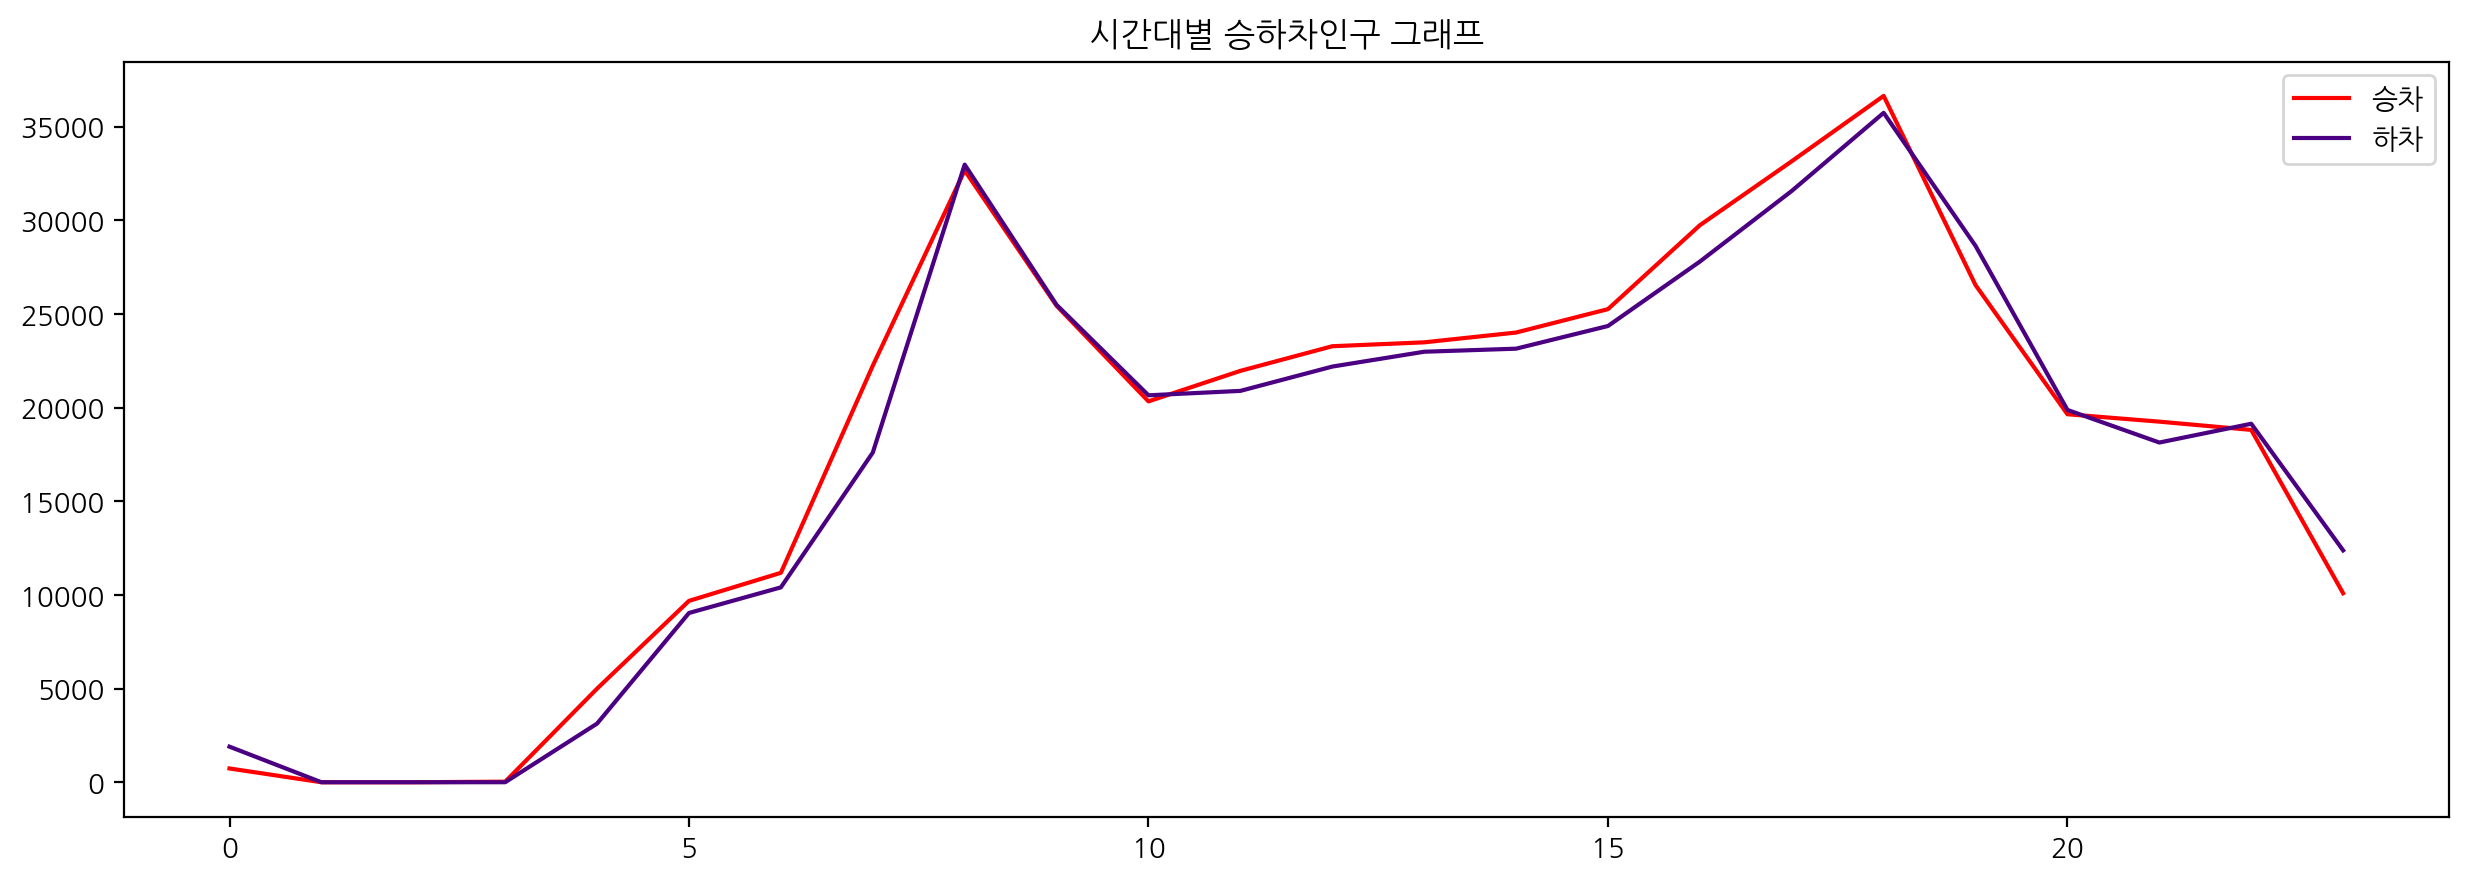

In [26]:
plt.figure(dpi=100, figsize= (15, 5))
plt.title('시간대별 승하차인구 그래프')
plt.plot(range(24), geton, color = 'red', label='승차')
plt.plot(range(24), getoff, color = 'indigo', label='하차')
plt.legend()
plt.show()

### 2. 두 개 노선 비교하기

In [28]:
bus2 = input('비교할 버스 번호 입력 : ')

geton2  = [0 for i in range(24)]
getoff2 = [0 for i in range(24)]

for row in data : 
    if row[2] == bus2 : 
        # 승차 인덱스 = (시간 + 4)*2, 하차인덱스 = 승차인덱스+1
        for i in range(24) : 
            geton2[i] += int(row[(i+4)*2])
            getoff2[i] += int(row[(i+4)*2+1])
print(geton2)
print(getoff2)

비교할 버스 번호 입력 : 110B
[1625, 0, 0, 0, 2806, 8557, 11153, 21453, 31693, 26992, 24383, 23999, 25269, 26230, 26263, 29341, 32660, 35605, 37427, 29783, 23000, 21680, 20243, 10599]
[2780, 3, 0, 0, 1781, 7310, 10209, 17446, 31160, 27013, 23972, 23193, 24208, 25478, 25132, 28006, 30593, 33773, 37081, 31875, 23311, 20887, 20501, 12892]


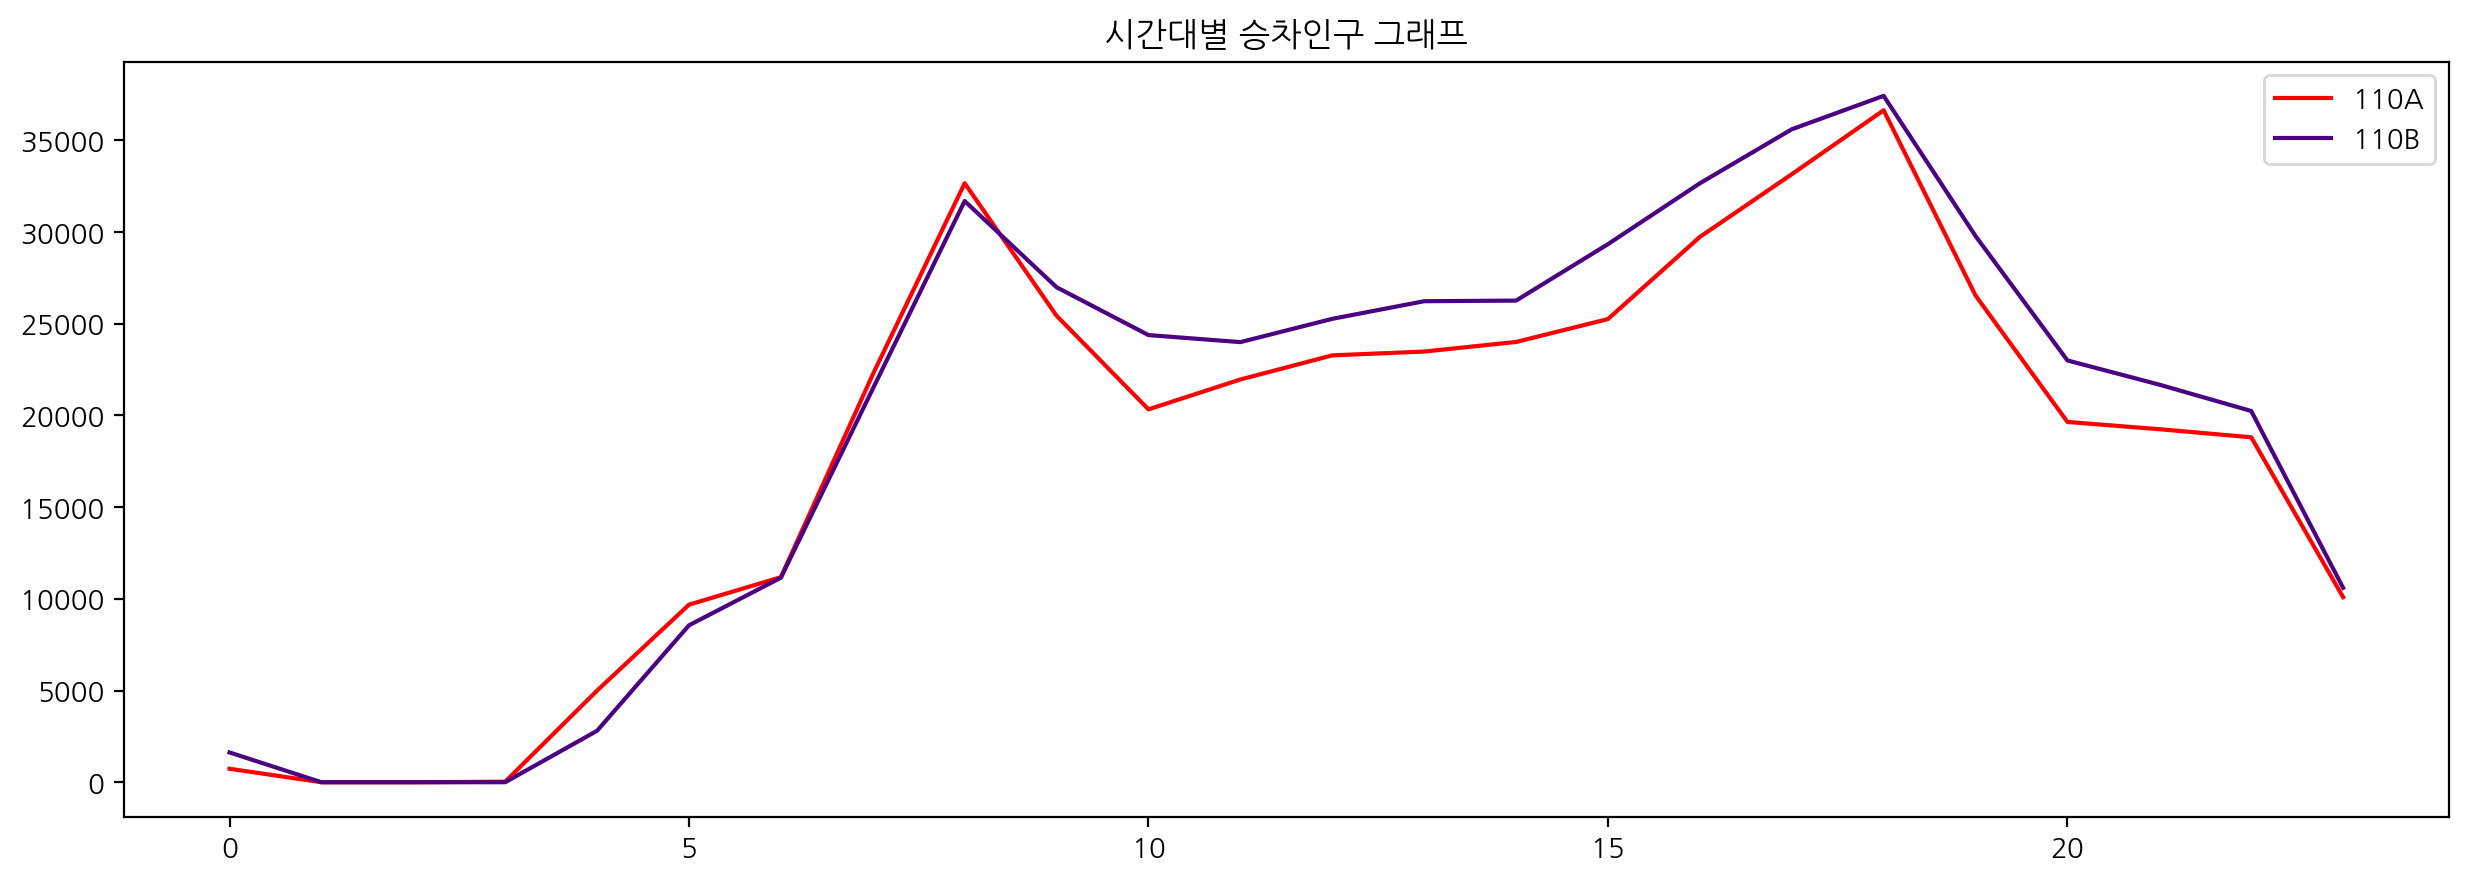

In [31]:
plt.figure(dpi=100, figsize= (15, 5))
plt.title('시간대별 승차인구 그래프')
plt.plot(range(24), geton, color = 'red', label=bus)
plt.plot(range(24), geton2, color = 'indigo', label=bus2)
plt.legend()
plt.show()

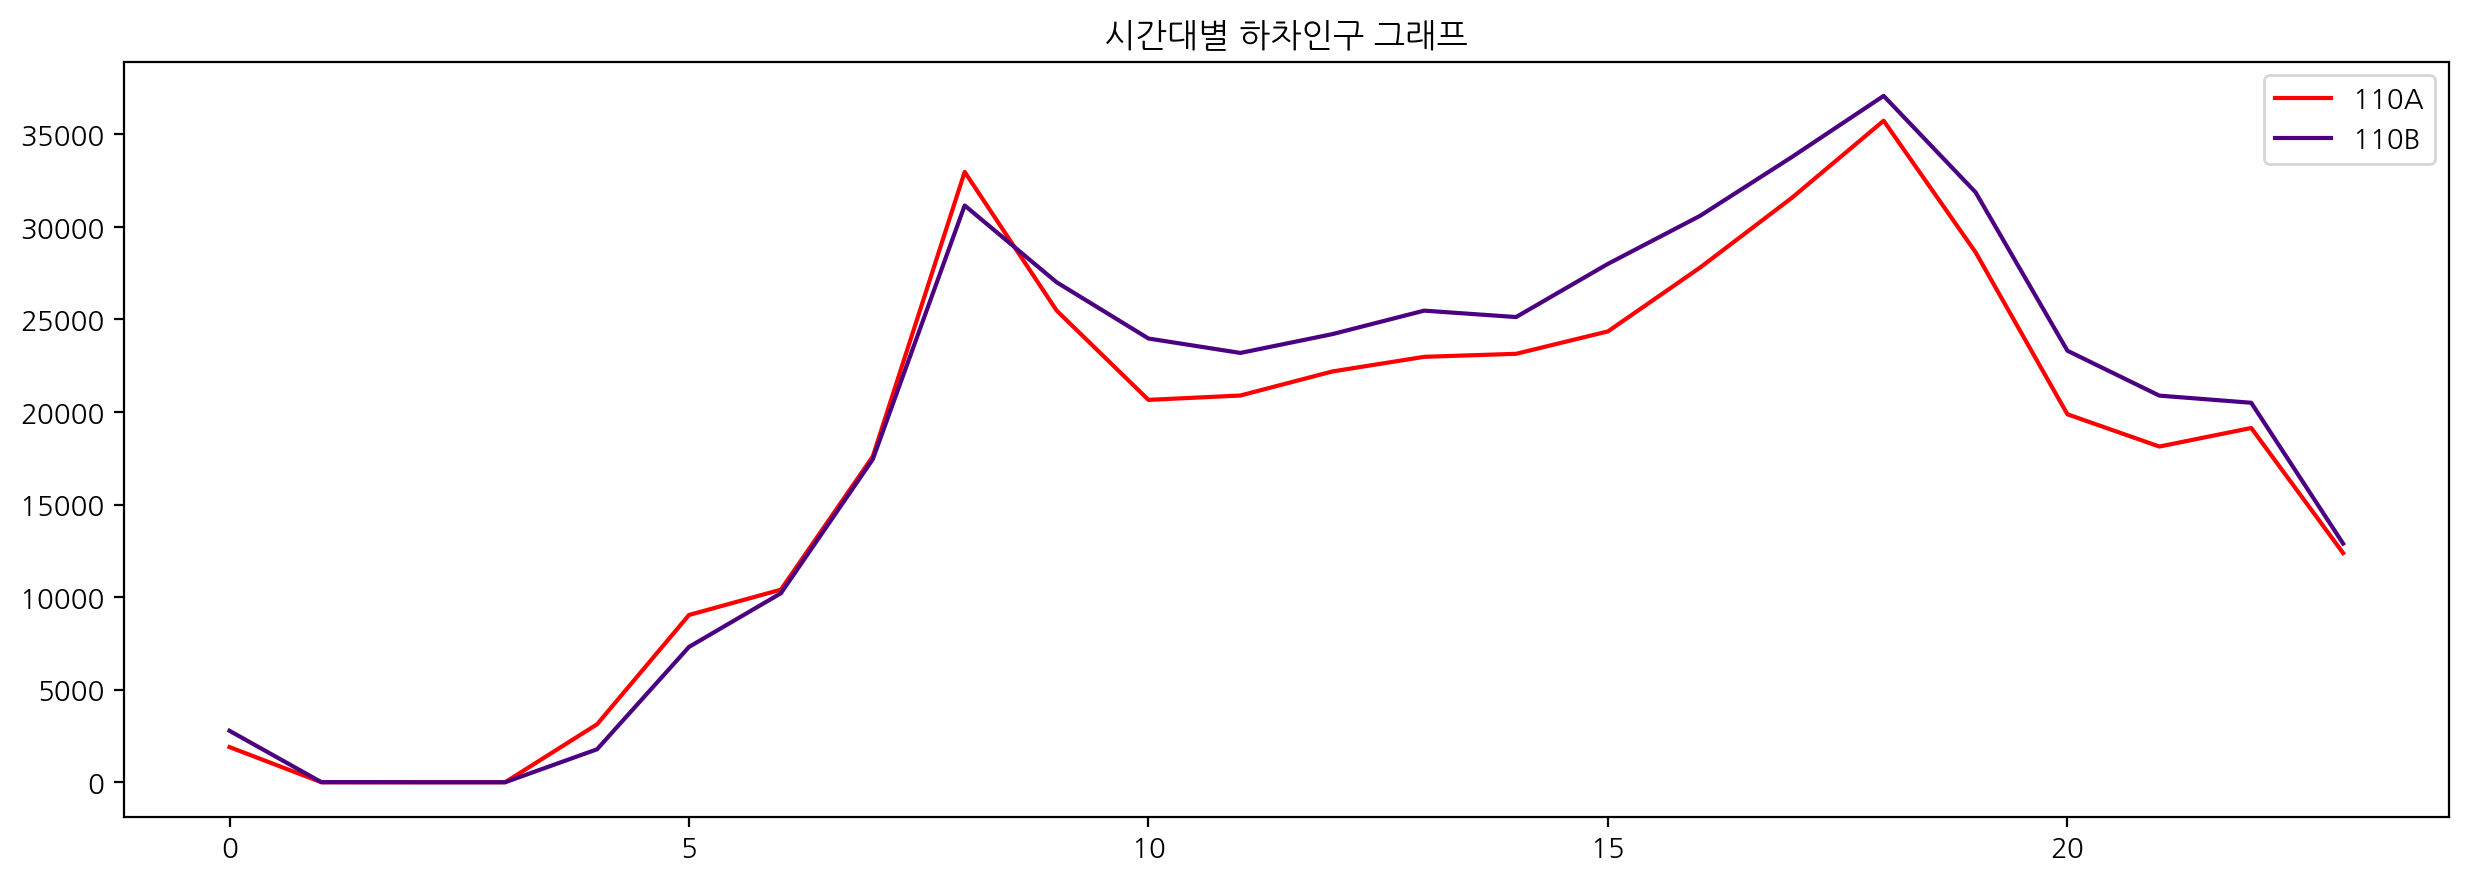

In [32]:
plt.figure(dpi=100, figsize= (15, 5))
plt.title('시간대별 하차인구 그래프')
plt.plot(range(24), getoff, color = 'red', label=bus)
plt.plot(range(24), getoff2, color = 'indigo', label=bus2)
plt.legend()
plt.show()